# Marathon Data

In [1]:
data_url = '../data/NYCM2008.csv'

import pandas as pd
df = pd.read_csv(data_url)
df.head()

,age,gender,split,final
0,31,M,1:06:07,2:08:43
1,32,M,1:06:06,2:09:07
2,30,M,1:06:06,2:11:22
3,39,M,1:06:06,2:13:10
4,30,M,1:06:06,2:13:33


In [2]:
df['split_sec'] = pd.to_timedelta(df.split).apply(lambda x: x.seconds)
df['final_sec'] = pd.to_timedelta(df.final).apply(lambda x: x.seconds)
df.head()

,age,gender,split,final,split_sec,final_sec
0,31,M,1:06:07,2:08:43,3967,7723
1,32,M,1:06:06,2:09:07,3966,7747
2,30,M,1:06:06,2:11:22,3966,7882
3,39,M,1:06:06,2:13:10,3966,7990
4,30,M,1:06:06,2:13:33,3966,8013


In [3]:
from altair import expr

data = expr.DataFrame(data_url)

def seconds(val):
    return (3600 * expr.parseInt(expr.slice(val, 0, 1)) +
            60 * expr.parseInt(expr.slice(val, 2, 4)) +
            expr.parseInt(expr.slice(val, 5, 7)))

data['split_sec'] = seconds(data.split)
data['final_sec'] = seconds(data.final)

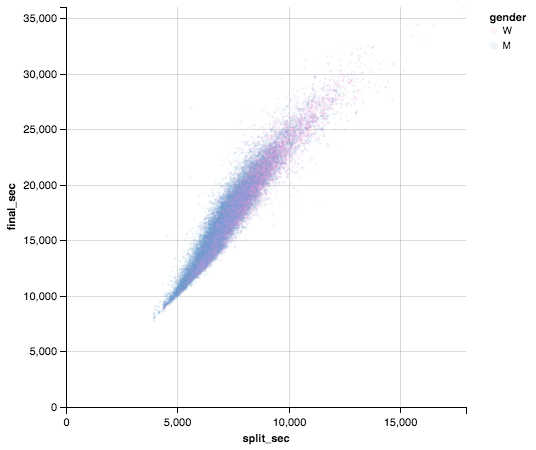

In [4]:
from altair import *

gender_color = Color('gender:N',
                     scale=Scale(domain=["W", "M"],
                                 range=['#EA98D2', '#659CCA']))

Chart(data).mark_circle(opacity=0.1, size=4).encode(
    x='split_sec',
    y='final_sec',
    color=gender_color
).configure_cell(width=400, height=400)

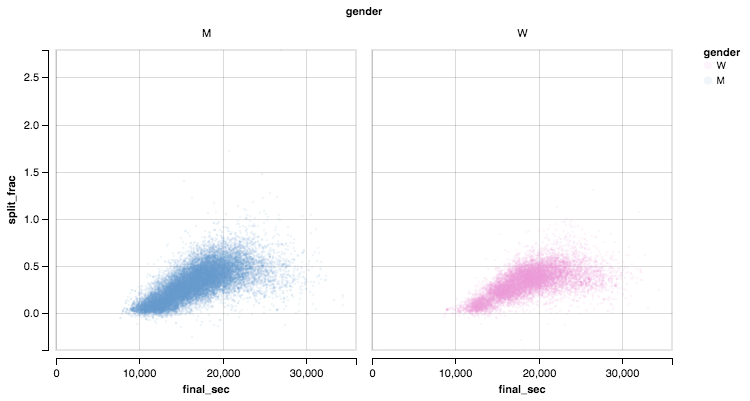

In [5]:
data['split_frac'] = (data.final_sec - data.split_sec) // data.split_sec - 1

Chart(data).mark_circle(opacity=0.1, size=4).encode(
    x='final_sec',
    y='split_frac',
    color=gender_color,
    column='gender:N',
).configure_cell(height=300, width=300)

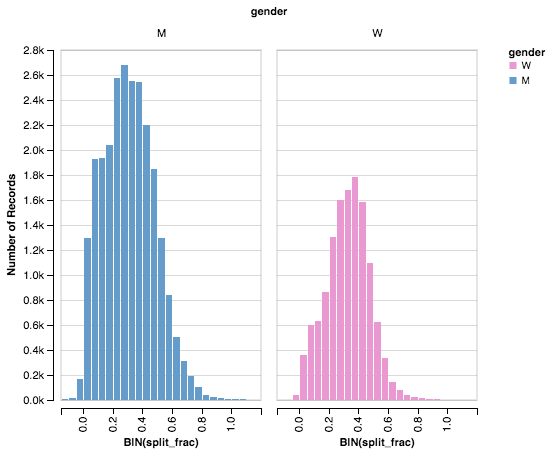

In [6]:
# filter the data so that split_frac is in this range
data = data[(data.split_frac < 1.2) & (data.split_frac > -0.2)]

Chart(data).mark_bar().encode(
    x=X('split_frac', bin=Bin(maxbins=50)),
    y='count(*):Q',
    color=gender_color,
    column='gender',
).configure_cell(width=200)

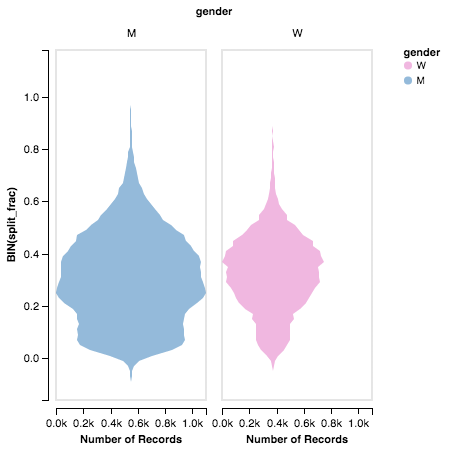

In [7]:
Chart(data).mark_area(
    stacked='center'
).encode(
    x=X('count(*):Q', axis=Axis(grid=False)),
    y=Y('split_frac', bin=Bin(maxbins=100)),
    column='gender',
    color=gender_color,
).configure_cell(width=150)

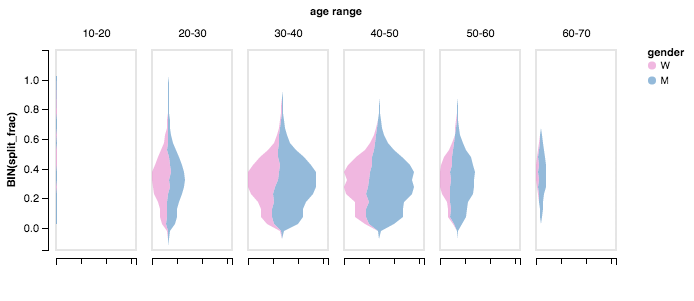

In [10]:
data = data[(data.age > 10) & (data.age < 70)]

Chart(data).mark_area(
    stacked='center'
).encode(
    x=X('count(*):Q', axis=Axis(grid=False, labels=False, title=' ')),
    y=Y('split_frac', bin=Bin(maxbins=50)),
    column=Column('age', bin=Bin(step=10, min=10, max=70),
                  axis=Axis(title='age range')),
    color=gender_color,
).configure_cell(width=80, height=200)